The prediction is a binary classification problem, predicting whether a match is win (1) or not (0).

# Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle

# Understanding Data

In [34]:
games = pd.read_csv("data/games_advanced_stats.csv")

In [35]:
games.head()

,season,team,PTS40,OP_PTS40,PTS,OP_PTS,3P%,OP_3P%,2P%,OP_2P%,...,NETRtg,eFG%,OP_eFG%,TS%,OP_TS%,game_id,round,location,OP_team,win
0,2016,BAS,85.0,84.0,85,84,31.578947,34.782609,65.000000,50.000000,...,1.346983,59.322034,50.746269,61.487269,55.732484,2016_1_BAS_EFS,1,home_team,EFS,True
1,2016,EFS,84.0,85.0,84,85,34.782609,31.578947,50.000000,65.000000,...,-1.346983,50.746269,59.322034,55.732484,61.487269,2016_1_BAS_EFS,1,away_team,BAS,False
2,2016,FNR,67.0,66.0,67,66,50.000000,26.923077,35.000000,52.941176,...,1.491647,45.370370,47.500000,52.245789,51.594747,2016_1_FNR_BAM,1,home_team,BAM,True
3,2016,BAM,66.0,67.0,66,67,26.923077,50.000000,52.941176,35.000000,...,-1.491647,47.500000,45.370370,51.594747,52.245789,2016_1_FNR_BAM,1,away_team,FNR,False
4,2016,GAL,84.0,109.0,84,109,37.500000,54.545455,50.000000,69.047619,...,-31.110005,52.205882,73.437500,54.375971,76.245104,2016_1_GAL_CSK,1,home_team,CSK,False


In [36]:
# if it is a win = 1, lose = 0
games["wins"] = 0
for k in range(len(games)):
    if games["win"][k] == True:
        games["wins"][k] = 1
    else:
        games["wins"][k] = 0

<ipython-input-36-812f29e4c059>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["wins"][k] = 1
<ipython-input-36-812f29e4c059>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games["wins"][k] = 0


In [37]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        1764 non-null   int64  
 1   team          1764 non-null   object 
 2   PTS40         1764 non-null   float64
 3   OP_PTS40      1764 non-null   float64
 4   PTS           1764 non-null   int64  
 5   OP_PTS        1764 non-null   int64  
 6   3P%           1764 non-null   float64
 7   OP_3P%        1764 non-null   float64
 8   2P%           1764 non-null   float64
 9   OP_2P%        1764 non-null   float64
 10  FT%           1763 non-null   float64
 11  3PR           1764 non-null   float64
 12  OP_3PR        1764 non-null   float64
 13  FTR           1764 non-null   float64
 14  OP_FTR        1764 non-null   float64
 15  OREB%         1764 non-null   float64
 16  DREB%         1764 non-null   float64
 17  ASTR          1764 non-null   float64
 18  OP_ASTR       1764 non-null 

In [38]:
games.team.unique()

array(['BAS', 'EFS', 'FNR', 'BAM', 'GAL', 'CSK', 'KAZ', 'BAR', 'MIL',
       'MTA', 'PAO', 'ZAL', 'RED', 'DAR', 'RMD', 'OLY', 'KHI', 'VAL',
       'MAL', 'BUD', 'CAN', 'MUN', 'ASV', 'BER', 'ZEN'], dtype=object)

In [39]:
games.describe()

,season,PTS40,OP_PTS40,PTS,OP_PTS,3P%,OP_3P%,2P%,OP_2P%,FT%,...,PACE,ORtg,DRtg,NETRtg,eFG%,OP_eFG%,TS%,OP_TS%,round,wins
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1763.000000,...,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,2017.367347,79.786824,79.786824,80.296485,80.296485,37.197319,37.197319,52.879395,52.879395,76.124078,...,71.240176,112.031428,112.031428,0.000000,54.036602,54.036602,57.778852,57.778852,14.397959,0.500000
std,1.069868,10.748314,10.748314,10.987125,10.987125,10.548910,10.548910,8.320199,8.320199,12.140289,...,3.853030,14.110581,14.110581,18.636718,7.782804,7.782804,7.350117,7.350117,8.458052,0.500142
min,2016.000000,51.000000,51.000000,51.000000,51.000000,6.250000,6.250000,23.333333,23.333333,0.000000,...,60.100000,65.586420,65.586420,-67.587423,31.159420,31.159420,34.592869,34.592869,1.000000,0.000000
25%,2016.000000,72.000000,72.000000,73.000000,73.000000,30.000000,30.000000,47.222222,47.222222,68.750000,...,68.580000,102.638367,102.638367,-12.082464,48.461538,48.461538,52.502158,52.502158,7.000000,0.000000
50%,2017.000000,80.000000,80.000000,80.000000,80.000000,37.037037,37.037037,52.941176,52.941176,76.923077,...,71.120000,112.367157,112.367157,0.000000,53.787879,53.787879,57.702817,57.702817,14.000000,0.500000
75%,2018.000000,87.000000,87.000000,87.000000,87.000000,44.117647,44.117647,58.333333,58.333333,84.615385,...,73.820000,121.652605,121.652605,12.082464,59.482759,59.482759,62.801759,62.801759,21.000000,1.000000
max,2019.000000,116.000000,116.000000,116.000000,116.000000,83.333333,83.333333,80.000000,80.000000,100.000000,...,83.280000,170.437849,170.437849,67.587423,79.411765,79.411765,81.210191,81.210191,30.000000,1.000000


# Data Visualization

In [40]:
# no data snooping!
train, test = train_test_split(games, test_size = 0.2)

# use a copy to not lose 
train_copy = train

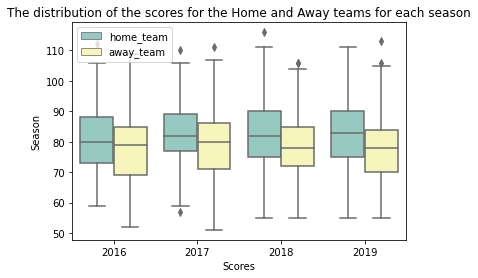

In [41]:
# the distribution of the scores for the Home and Away teams for each season

sns.boxplot(hue="location", x="season", y="PTS", data=train_copy, palette="Set3")
plt.xlabel("Scores")
plt.ylabel("Season")
plt.title("The distribution of the scores for the Home and Away teams for each season")
plt.legend(loc='upper left');

Home teams tend to score more as of each season.

In [42]:
# calculate the total wins of each team
unique_teams = train_copy.team.unique()

total_wins = dict((el,0) for el in unique_teams)

wins = []

for i in range(len(unique_teams)):
    wins.append(train_copy.loc[games["team"] == unique_teams[i], 'win'].sum())
    
keys = list(total_wins.keys())
total_wins[keys[1]]

for i in range(len(total_wins)):
    total_wins[keys[i]] = wins[i]
    
total_wins

{'ZAL': 43,
 'OLY': 50,
 'CSK': 70,
 'FNR': 60,
 'MUN': 12,
 'RED': 28,
 'BAS': 46,
 'MIL': 34,
 'BER': 4,
 'BAR': 44,
 'EFS': 51,
 'DAR': 18,
 'BAM': 17,
 'KHI': 22,
 'KAZ': 4,
 'RMD': 67,
 'GAL': 10,
 'PAO': 52,
 'MTA': 33,
 'BUD': 6,
 'ZEN': 5,
 'CAN': 7,
 'VAL': 12,
 'MAL': 12,
 'ASV': 7}

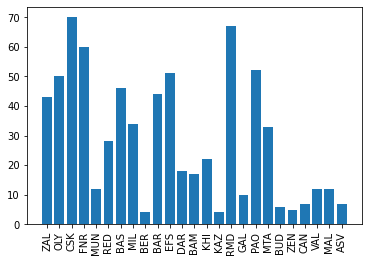

In [43]:
keys = total_wins. keys()
values = total_wins. values()
plt.bar(keys, values)
plt.xticks(rotation=90);

In [44]:
train_copy.team.value_counts()

CSK    91
MIL    88
RMD    88
BAR    88
EFS    87
PAO    87
FNR    87
BAS    87
ZAL    86
OLY    85
MTA    81
RED    66
KHI    58
DAR    52
BAM    49
MUN    34
VAL    31
BUD    27
GAL    24
KAZ    24
CAN    24
MAL    23
BER    16
ZEN    15
ASV    13
Name: team, dtype: int64

## Missing Values

In [45]:
train_copy.isna().sum()

season          0
team            0
PTS40           0
OP_PTS40        0
PTS             0
OP_PTS          0
3P%             0
OP_3P%          0
2P%             0
OP_2P%          0
FT%             1
3PR             0
OP_3PR          0
FTR             0
OP_FTR          0
OREB%           0
DREB%           0
ASTR            0
OP_ASTR         0
TOVR            0
OP_TOVR         0
PFR             0
PFDR            0
AST-TOV_R       0
OP_AST-TOV_R    0
STLR            0
OP_STLR         0
BLKR            0
OP_BLKR         0
PACE            0
ORtg            0
DRtg            0
NETRtg          0
eFG%            0
OP_eFG%         0
TS%             0
OP_TS%          0
game_id         0
round           0
location        0
OP_team         0
win             0
wins            0
dtype: int64

In [46]:
train_copy["FT%"]

1406    72.727273
1434    88.571429
594     75.000000
708     80.000000
1404    68.421053
          ...    
1205    78.571429
1101    66.666667
230     75.000000
419     61.111111
1117    92.307692
Name: FT%, Length: 1411, dtype: float64

In [47]:
train_copy["FT%"].fillna(train_copy["FT%"].mean(), inplace=True)

/Users/delaldeniztomruk/opt/anaconda3/envs/euroleague/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [48]:
train_copy.isna().sum().sum()

0

In [49]:
games_copy = train_copy

In [50]:
games_copy.isna().sum().sum()

0

## Pearson Correlation

In [51]:
plt.figure(figsize=(12,10))
cor = games_copy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=0.5, fmt=".2f")
plt.show()

KeyboardInterrupt: 

In [ ]:
# see which variables have the most correlation
cor = games_copy.corr()
cor_target = abs(cor["wins"])
relevant_features = cor_target[(cor_target>0.5)]
relevant_features

In [ ]:
# see if these variables are uncorrelated with each other
print(games_copy[["NETRtg","win"]].corr())

According to Pearson Correlation, we can only use NETRtg to predict ```wins```.

# Prepare Data

### Write Functions

In [ ]:
games = pd.read_csv("data/games_advanced_stats.csv")

In [ ]:
# no data snooping, split the test and train data

test_season = 2019

games_train = games[games['season'] != test_season]
games_test = games[games['season'] == test_season]

# make a copy of train data
games_train_copy = games_train

# make a copy of test data
games_test_copy = games_test

In [ ]:
# fill missing values
def missing_values(games):
    """
    Takes the games dataframe and fills out the missing values.
    """
    
    games["FT%"].fillna(games["FT%"].mean(), inplace=True)
    games = games.reset_index()
    return games
    
# feature selection
def feature_selection(games):
    """
    Takes the games dataframe and applies feature selection to the dataframe after.
    """
    
    # if it is a win = 1, lose = 0
    games["wins"] = 0
    for k in range(len(games)):
        if games["win"][k] == True:
            games["wins"][k] = 1
        else:
            games["wins"][k] = 0
        
    # drop unnecessary columns
    games.drop("game_id", axis = 1, inplace=True)
    games.drop("win", axis = 1, inplace=True)
    games = games.reset_index()
    return games
    
def cat_to_num_games(games):
    """
    Takes the games dataframe and returns the dataframe with transformed categorical to numerical values.
    """
    cat_col = ["team", "location", "OP_team"]
    dummies = pd.get_dummies(games[cat_col])
    games = games.drop(cat_col, axis = 1)
    games = pd.concat([games, dummies], axis = 1)
    return games

# for games and teams

# scaling
def scaling(df):
    """
    Takes the games and teams dataframes separately and returns the dataframe after min-max scaling.
    """
    scaler = MinMaxScaler()
    transformed = scaler.fit_transform(df)
    # keep the column names
    cat_df = pd.DataFrame(transformed, columns = df.columns)
    df = cat_df
    return df
    

def together(games):
    """
    Returns the games and teams dataframes after all applications.
    """
    #games
    games = missing_values(games)
    games = feature_selection(games)
    games = cat_to_num_games(games)
    #games = scaling(games)
    return games

In [ ]:
games_train_final = together(games_train_copy)

In [ ]:
games_train_final.head()

In [ ]:
# apply transformations to test data separately
games_test_final = together(games_test_copy)

# Modeling

In [ ]:
games_train_final

In [ ]:
games_train_final.season.value_counts()

In [ ]:
df_train = games_train_final[games_train_final.season == 2019]
df_val = games_train_final[games_train_final.season < 2019]

X_train, y_train = df_train.drop("wins", axis = 1), df_train["wins"]
X_val, y_val = df_val.drop("wins", axis = 1), df_val["wins"]

In [32]:
models = { "LogReg": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "RandomForest": RandomForestClassifier()}
         
         
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate each ML model.
    """
    model_score = {}
    
    for model_name, model_initialized in models.items():
        model_initialized.fit(X_train, y_train)
        model_score[model_name] = model_initialized.score(X_test, y_test)
    return model_score
         
model_score = fit_score(models, X_train, X_val, y_train, y_val)
model_score

ValueError: Found array with 0 sample(s) (shape=(0, 85)) while a minimum of 1 is required.

In [ ]:
X_test = games_test_final.drop("wins", axis = 1)
y_test = games_test_final["wins"]

X_train = games_train_final.drop("wins", axis = 1)
y_train = games_train_final["wins"]